In [163]:
import numpy as np

# Compatibility fix for NumPy 2.0+
if not hasattr(np, 'int'):
    np.int = int
if not hasattr(np, 'float'):
    np.float = float
if not hasattr(np, 'bool'):
    np.bool = bool

In [164]:
import pandas as pd
import numpy as np

df = pd.read_csv('medico data.csv')

print(f"Dataset shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")
print(df.head())
print(df.info())

Dataset shape: (627, 4)
Columns: ['Gender', 'Age Group', 'Complaint', 'Diagnosis']
  Gender Age Group                Complaint  \
0      M     10•19          Headache, Fever   
1      F       20>                Toothache   
2      M     10•19  Painful Swelling, Fever   
3      M     10•19                    Fever   
4      F       20>      Headache, Body Pain   

                                    Diagnosis  
0                                     Malaria  
1                               Dental Cavity  
2  Malaria, Upper Respiratory Tract Infection  
3                                     Malaria  
4                                     Malaria  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 627 entries, 0 to 626
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Gender     626 non-null    object
 1   Age Group  625 non-null    object
 2   Complaint  627 non-null    object
 3   Diagnosis  627 non-null    object
dtypes: 

In [165]:
print("\nDataset Overview:")
print(f"Total records: {len(df)}")
print(f"Unique complaints: {df['Complaint'].nunique()}")
print(f"Unique diagnoses: {df['Diagnosis'].nunique()}")
print(f"Gender distribution:\n{df['Gender'].value_counts()}")
print(f"Age group distribution:\n{df['Age Group'].value_counts()}")


Dataset Overview:
Total records: 627
Unique complaints: 89
Unique diagnoses: 67
Gender distribution:
Gender
M    373
F    253
Name: count, dtype: int64
Age group distribution:
Age Group
20>      334
10•19    291
Name: count, dtype: int64


## Data Cleaning

In [166]:
df = df.dropna()

In [167]:
df.drop('Age Group',axis = 1, inplace=True)

In [168]:
df

,Gender,Complaint,Diagnosis
0,M,"Headache, Fever",Malaria
1,F,Toothache,Dental Cavity
2,M,"Painful Swelling, Fever","Malaria, Upper Respiratory Tract Infection"
3,M,Fever,Malaria
4,F,"Headache, Body Pain",Malaria
...,...,...,...
622,M,Fever,Acute Malaria
623,M,Headache,Malaria
624,M,Headache,Malaria
625,M,Body Pain,Residual Malaria


In [169]:
merge_map = {
    # Malaria-related
    "Acute Malaria": "Malaria",
    "Drug-Resistant Malaria": "Malaria",
    "Residual Malaria": "Malaria",
    "Malaria": "Malaria",
    "Diarrhea, Acute Malaria": "Malaria",
    "Malaria, Gastritis": "Malaria",
    "Malaria, Gastroenteritis": "Malaria",
    "Malaria, Neuromuscular Dystrophy": "Malaria",
    "Malaria, Refractive Error": "Malaria",
    "Malaria, Sepsis": "Malaria",
    "Malaria, Upper Respiratory Tract Infection": "Malaria",
    "Acute Malaria, Upper Respiratory Tract Infection": "Malaria",
    "Otitis Media, Malaria": "Malaria",
    "Urinary Tract Infection, Malaria": "Malaria",

    # URTI-related
    "Upper Respiratory Tract Infection": "URTI",
    "Malaria, Upper Respiratory Tract Infection": "URTI",
    "Drug-Resistant Malaria, Upper Respiratory Tract Infection": "URTI",
    "Rhinitis, Acute Malaria": "URTI",
    "Rhinitis": "URTI",
    "Allergic Rhinitis": "URTI",

    # Gastrointestinal
    "Acute Food Poisoning": "Gastrointestinal",
    "Acute Gastritis": "Gastrointestinal",
    "Acute Watery Diarrhea": "Gastrointestinal",
    "Dyspepsia": "Gastrointestinal",
    "Enteric Fever": "Gastrointestinal",
    "Diarrhea": "Gastrointestinal",
    "Gastroenteritis, Malaria": "Gastrointestinal",

    # Allergy-related
    "Allergic Dermatitis": "Allergy",
    "Allergic Ophthalmitis": "Allergy",
    "Allergic Reaction": "Allergy",
    "Allergic Rhinitis": "Allergy",
    "Allergies": "Allergy",
    "Urticaria": "Allergy",
    "Pruritus": "Allergy",
    "Dermatitis": "Allergy",

    # Skin issues
    "Skin Rashes": "Skin Condition",
    "Skin Burns": "Skin Condition",
    "Scabies": "Skin Condition",
    "Macular Rash": "Skin Condition",
    "Hypopigmented Patches": "Skin Condition",
    "Carbuncle": "Skin Condition",
    "Cellulitis": "Skin Condition",
    "Upper Respiratory Tract Infection, Carbuncle": "Skin Condition",

    # Pain & Musculoskeletal
    "Musculoskeletal Pain": "Musculoskeletal",
    "Urinary Tract Infection, Musculoskeletal Pain": "Musculoskeletal",
    "Shoulder Ache": "Musculoskeletal",
    "Arm Ache": "Musculoskeletal",
    "Chest Ache": "Musculoskeletal",
    "Stress-Induced Headache": "Headache",
    "Headache": "Headache",

    # Eye problems
    "Foreign Body In Left Eye": "Eye Problem",
    "Myopia": "Eye Problem",
    "Malaria, Refractive Error": "Eye Problem",

    # Urinary tract
    "Cystitis": "UTI",
    "Urinary Tract Infection": "UTI",
    "Urinary Tract Infection, Malaria": "UTI",

    # Dental
    "Dental Cavity": "Dental",
    "Gingivitis": "Dental",
    "Tooth Ache": "Dental",

    # Injury / Trauma
    "Hand Injury": "Injury",
    "Subluxation In Left Big Toe": "Injury",
    "Injury": "Injury",

    # Fever
    "Febrile Illness": "Fever",
    "Fever": "Fever",

    # Others
    "Otitis Media": "ENT Infection",
    "Pleurisy": "Lung Issue",
    "Seizure": "Neurological",
    "Dysmenorrhoea": "Gynaecological",
    "Heat Rash": "Heat Rash",
    "Kidney Disease": "Kidney Issue"
}


In [170]:
df['Diagnosis_Grouped'] = df['Diagnosis'].map(merge_map)

df['Diagnosis_Grouped'] = df['Diagnosis_Grouped'].fillna(df['Diagnosis'])

In [171]:
df = df.drop(columns=['Diagnosis'])
df = df.rename(columns={'Diagnosis_Grouped': 'Diagnosis'})

In [172]:
# Step 1: Count how many times each label appears
label_counts = df['Diagnosis'].value_counts()

# Step 2: Set threshold for rare classes
threshold = 10
common_labels = label_counts[label_counts >= threshold].index

# Step 3: Keep only rows with common labels
df_filtered = df[df['Diagnosis'].isin(common_labels)]


In [173]:
print("Original dataset size:", len(df))
print("Filtered dataset size:", len(df_filtered))
print("Remaining number of classes:", df_filtered['Diagnosis'].nunique())
print("Former number of classes:", df['Diagnosis'].nunique())

Original dataset size: 624
Filtered dataset size: 587
Remaining number of classes: 6
Former number of classes: 19


In [174]:
dropped_labels = label_counts[label_counts < threshold]
print("Dropped classes:\n", dropped_labels)
ret_labels = label_counts[label_counts > threshold]
print("Retained classes:\n", ret_labels)

Dropped classes:
 Diagnosis
Headache          6
ENT Infection     6
Dental            4
Injury            4
UTI               4
Eye Problem       3
Gynaecological    3
Fever             2
Lung Issue        1
Acute Asthma      1
Heat Rash         1
Neurological      1
Kidney Issue      1
Name: count, dtype: int64
Retained classes:
 Diagnosis
Malaria             458
URTI                 73
Allergy              20
Musculoskeletal      14
Skin Condition       11
Gastrointestinal     11
Name: count, dtype: int64


In [180]:
df = df_filtered

In [181]:
df

,Gender,Complaint,Diagnosis
0,M,"Headache, Fever",Malaria
2,M,"Painful Swelling, Fever",URTI
3,M,Fever,Malaria
4,F,"Headache, Body Pain",Malaria
5,M,"Headache, Fever",Malaria
...,...,...,...
622,M,Fever,Malaria
623,M,Headache,Malaria
624,M,Headache,Malaria
625,M,Body Pain,Malaria


In [182]:
multiple_diagnoses = df[df['Diagnosis'].str.contains(',', na=False)]
print(f"Entries with multiple diagnoses: {len(multiple_diagnoses)}")

#df['Age Group'] = df['Age Group'].fillna('Unknown')
df['Primary_Diagnosis'] = df['Diagnosis'].str.split(',').str[0].str.strip()
df['Gender'] = df['Gender'].fillna('Unknown')

Entries with multiple diagnoses: 0


<ipython-input-182-c0b48528bae7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Primary_Diagnosis'] = df['Diagnosis'].str.split(',').str[0].str.strip()
<ipython-input-182-c0b48528bae7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender'] = df['Gender'].fillna('Unknown')


## Text Preprocessing

In [183]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

def preprocess_text(text):
    if pd.isna(text):
        return ""
    
    # Convert to lowercase
    text = str(text).lower()
    
    # Remove special characters but keep spaces and commas
    text = re.sub(r'[^a-zA-Z\s,]', '', text)
    
    # Split by comma to handle multiple symptoms
    symptoms = [symptom.strip() for symptom in text.split(',')]
    
    processed_symptoms = []
    for symptom in symptoms:
        if symptom:  # Skip empty symptoms
            # Tokenize
            tokens = word_tokenize(symptom)
            
            # Remove common stopwords but keep medical-relevant ones
            medical_stopwords = set(stopwords.words('english')) - {
                'pain', 'ache', 'swelling', 'fever', 'headache', 'weakness'
            }
            tokens = [word for word in tokens if word not in medical_stopwords]
            
            # Light stemming for medical terms
            stemmer = PorterStemmer()
            tokens = [stemmer.stem(word) for word in tokens]
            
            processed_symptoms.append(' '.join(tokens))
    
    return ' '.join(processed_symptoms)

# Apply preprocessing to complaint column
df['cleaned_symptoms'] = df['Complaint'].apply(preprocess_text)

<ipython-input-183-0f5d6dfc0c41>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cleaned_symptoms'] = df['Complaint'].apply(preprocess_text)


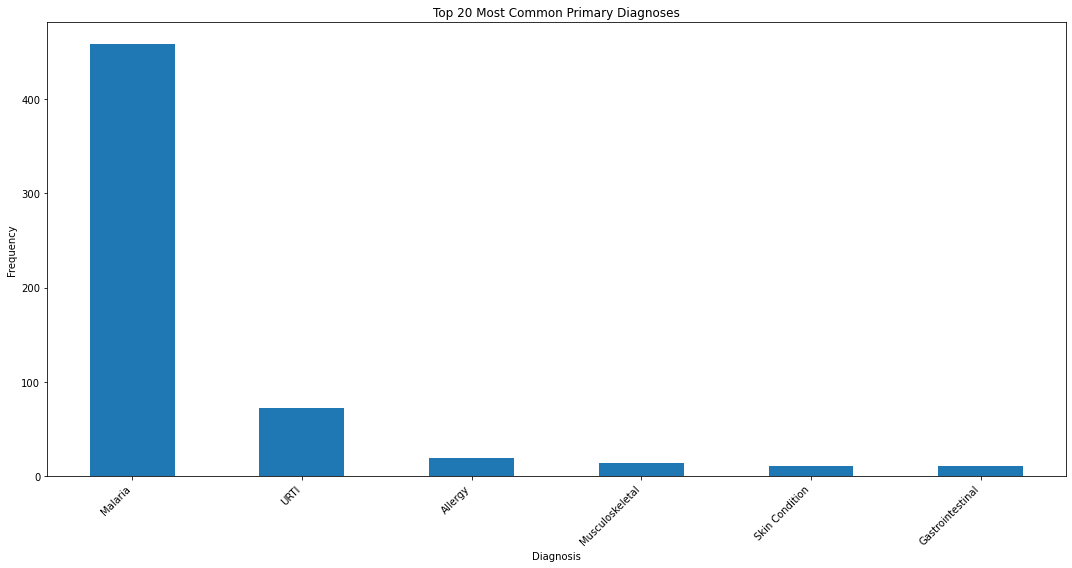

Most common diagnosis: Malaria
Occurs in: 458 cases


AttributeError: 'SubplotSpec' object has no attribute 'is_first_col'

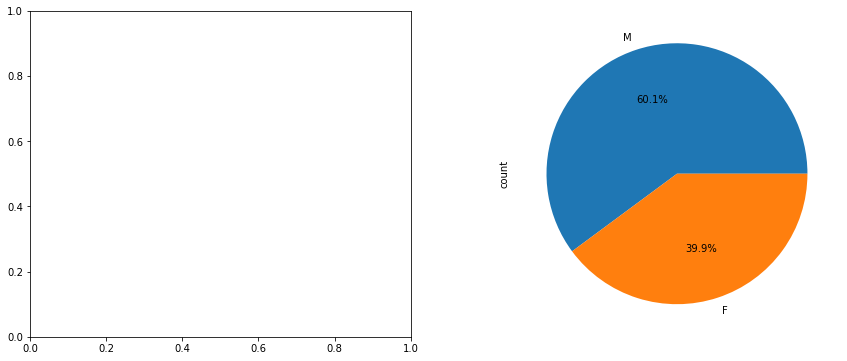

In [184]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of primary diagnoses
plt.figure(figsize=(15, 8))
top_diagnoses = df['Primary_Diagnosis'].value_counts().head(20)
top_diagnoses.plot(kind='bar')
plt.title('Top 20 Most Common Primary Diagnoses')
plt.xlabel('Diagnosis')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Based on your data, Malaria is the most common diagnosis
print(f"Most common diagnosis: {df['Primary_Diagnosis'].value_counts().index[0]}")
print(f"Occurs in: {df['Primary_Diagnosis'].value_counts().iloc[0]} cases")

# Distribution by age group and gender
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Age group distribution
# df['Age Group'].value_counts().plot(kind='pie', ax=ax1, autopct='%1.1f%%')
# ax1.set_title('Distribution by Age Group')

# Gender distribution
df['Gender'].value_counts().plot(kind='pie', ax=ax2, autopct='%1.1f%%')
ax2.set_title('Distribution by Gender')

plt.tight_layout()
plt.show()

# Word cloud of symptoms
from wordcloud import WordCloud
all_symptoms = ' '.join(df['Complaint'].dropna().astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_symptoms)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Common Symptoms Word Cloud')
plt.show()

# Symptom-Diagnosis correlation analysis
print("\nTop symptom-diagnosis combinations:")
symptom_diagnosis = df.groupby(['Complaint', 'Primary_Diagnosis']).size().reset_index(name='count')
print(symptom_diagnosis.sort_values('count', ascending=False).head(10))

In [185]:
df_clean

,Gender,Complaint,Diagnosis,Primary_Diagnosis,cleaned_symptoms,demographic_features,combined_features
0,M,"Headache, Fever",Malaria,Malaria,headach fever,gender_m,headach fever gender_m
1,F,Toothache,Dental,Dental,toothach,gender_f,toothach gender_f
2,M,"Painful Swelling, Fever",URTI,URTI,pain swell fever,gender_m,pain swell fever gender_m
3,M,Fever,Malaria,Malaria,fever,gender_m,fever gender_m
4,F,"Headache, Body Pain",Malaria,Malaria,headach bodi pain,gender_f,headach bodi pain gender_f
...,...,...,...,...,...,...,...
622,M,Fever,Malaria,Malaria,fever,gender_m,fever gender_m
623,M,Headache,Malaria,Malaria,headach,gender_m,headach gender_m
624,M,Headache,Malaria,Malaria,headach,gender_m,headach gender_m
625,M,Body Pain,Malaria,Malaria,bodi pain,gender_m,bodi pain gender_m


In [186]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Remove rows with missing symptoms
df_clean = df[df['Complaint'].notna() & df['Primary_Diagnosis'].notna()].copy()

print(f"Clean dataset shape: {df_clean.shape}")
print(f"Unique diagnoses: {df_clean['Primary_Diagnosis'].nunique()}")

# Create feature combinations
# Method 1: Use only symptoms
X_symptoms = df_clean['cleaned_symptoms']
y = df_clean['Primary_Diagnosis']

# Method 2: Include demographic features (optional enhancement)
def create_demographic_features(row):
    features = []
    if row['Gender'] in ['M', 'F']:
        features.append(f"gender_{row['Gender'].lower()}")
    return ' '.join(features)

df_clean['demographic_features'] = df_clean.apply(create_demographic_features, axis=1)

# Combined features (symptoms + demographics)
df_clean['combined_features'] = df_clean['cleaned_symptoms'] + ' ' + df_clean['demographic_features']

# Create TF-IDF vectors
print("Creating TF-IDF vectors...")

# For symptoms only
vectorizer_symptoms = TfidfVectorizer(
    max_features=1000,  # Reduced for smaller dataset
    ngram_range=(1, 2),
    min_df=1,  # Keep all terms due to smaller dataset
    max_df=0.95,
    stop_words='english'
)

X_symptoms_vec = vectorizer_symptoms.fit_transform(X_symptoms)

# For combined features
vectorizer_combined = TfidfVectorizer(
    max_features=1500,
    ngram_range=(1, 2),
    min_df=1,
    max_df=0.95,
    stop_words='english'
)

X_combined_vec = vectorizer_combined.fit_transform(df_clean['combined_features'])

print(f"Symptoms feature shape: {X_symptoms_vec.shape}")
print(f"Combined feature shape: {X_combined_vec.shape}")

# Split the data (use combined features for better performance)
X_train, X_test, y_train, y_test = train_test_split(
    X_combined_vec, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

Clean dataset shape: (587, 5)
Unique diagnoses: 6
Creating TF-IDF vectors...
Symptoms feature shape: (587, 116)
Combined feature shape: (587, 156)
Training set size: 469
Test set size: 118


In [187]:
from collections import Counter
from imblearn.over_sampling import SMOTE

# Check class distribution
print(Counter(y_train))

# Apply SMOTE if classes are highly imbalanced
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

Counter({'Malaria': 366, 'URTI': 58, 'Allergy': 16, 'Musculoskeletal': 11, 'Skin Condition': 9, 'Gastrointestinal': 9})


AttributeError: 'NoneType' object has no attribute 'split'

In [188]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import joblib

# Initialize models
models = {
    'Naive Bayes': MultinomialNB(),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'SVM': SVC(kernel='linear', random_state=42, probability=True)
}

# Train and evaluate each model
best_model = None
best_accuracy = 0

for name, model in models.items():
    print(f"\n--- Training {name} ---")
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")
    
    # Detailed classification report
    print(f"Classification Report:\n{classification_report(y_test, y_pred)}")
    
    # Save best model
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model
        best_model_name = name

print(f"\nBest Model: {best_model_name} with accuracy: {best_accuracy:.4f}")


--- Training Naive Bayes ---
Accuracy: 0.8644
Classification Report:
                  precision    recall  f1-score   support

         Allergy       0.50      0.25      0.33         4
Gastrointestinal       0.00      0.00      0.00         2
         Malaria       0.89      0.97      0.93        92
 Musculoskeletal       1.00      0.33      0.50         3
  Skin Condition       0.00      0.00      0.00         2
            URTI       0.73      0.73      0.73        15

        accuracy                           0.86       118
       macro avg       0.52      0.38      0.42       118
    weighted avg       0.83      0.86      0.84       118


--- Training Random Forest ---


C:\Users\Oluwafolabomi Zion\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Oluwafolabomi Zion\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Oluwafolabomi Zion\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.8814
Classification Report:
                  precision    recall  f1-score   support

         Allergy       0.50      0.50      0.50         4
Gastrointestinal       0.00      0.00      0.00         2
         Malaria       0.90      0.98      0.94        92
 Musculoskeletal       1.00      0.67      0.80         3
  Skin Condition       0.00      0.00      0.00         2
            URTI       0.83      0.67      0.74        15

        accuracy                           0.88       118
       macro avg       0.54      0.47      0.50       118
    weighted avg       0.85      0.88      0.86       118


--- Training Logistic Regression ---
Accuracy: 0.8644
Classification Report:
                  precision    recall  f1-score   support

         Allergy       0.33      0.25      0.29         4
Gastrointestinal       0.00      0.00      0.00         2
         Malaria       0.89      0.97      0.93        92
 Musculoskeletal       1.00      0.33      0.50         3
  Skin C

C:\Users\Oluwafolabomi Zion\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Oluwafolabomi Zion\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Oluwafolabomi Zion\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Oluwafo

Classification Report:
                  precision    recall  f1-score   support

         Allergy       0.50      0.50      0.50         4
Gastrointestinal       0.00      0.00      0.00         2
         Malaria       0.93      0.97      0.95        92
 Musculoskeletal       0.75      1.00      0.86         3
  Skin Condition       0.00      0.00      0.00         2
            URTI       0.79      0.73      0.76        15

        accuracy                           0.89       118
       macro avg       0.49      0.53      0.51       118
    weighted avg       0.86      0.89      0.87       118


Best Model: SVM with accuracy: 0.8898


In [191]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Example: Fine-tune SVM
if best_model_name == 'SVM':
    param_grid = {
        'C': [0.1, 1, 10, 100],
        'kernel': ['rbf', 'poly', 'sigmoid'],
        'gamma': ['scale', 'auto', 0.001, 0.01]
    }
    
    grid_search = GridSearchCV(
        SVC(random_state=42),  # Use SVC instead of RandomForestClassifier
        param_grid,
        cv=5,
        scoring='accuracy',
        n_jobs=1
    )
    
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    print(f"Best parameters: {grid_search.best_params_}")

Best parameters: {'C': 100, 'gamma': 'auto', 'kernel': 'rbf'}


In [193]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Example: Fine-tune SVM
if best_model_name == 'SVM':
    param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],
    'kernel': ['rbf', 'poly', 'sigmoid']
}
    
    grid_search = GridSearchCV(
        SVC(random_state=42),  # Use SVC instead of RandomForestClassifier
        param_grid,
        cv=5,
        scoring='accuracy',
        n_jobs=1
    )
    
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    print(f"Best parameters: {grid_search.best_params_}")

Best parameters: {'C': 100, 'gamma': 'auto', 'kernel': 'rbf'}


In [ ]:
# Make predictions and evaluate
y_pred = best_model.predict(X_test)
from sklearn.metrics import classification_report, accuracy_score
print(f"Test Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

In [195]:
# Save the trained model and vectorizer
joblib.dump(best_model, 'medical_diagnosis_model.pkl')
joblib.dump(vectorizer_combined, 'symptom_vectorizer.pkl')

# Also save the label encoder if you used one
import pickle
with open('disease_labels.pkl', 'wb') as f:
    pickle.dump(list(y.unique()), f)

print("Model and vectorizer saved successfully!")

Model and vectorizer saved successfully!
